# The Boston Housing Price Dataset

In [59]:
from keras.datasets import boston_housing

from sklearn import preprocessing

import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

#os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [6]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [7]:
train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)
train_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
from sklearn import preprocessing

x_train = train_data_df.values #returns a numpy array
x_test = test_data_df.values #returns a numpy array
normalizer = preprocessing.StandardScaler()
x_train_scaled = normalizer.fit_transform(x_train)
x_test_scaled = normalizer.fit_transform(x_test)
train_data_df = pd.DataFrame(x_train_scaled)
test_data_df = pd.DataFrame(x_test_scaled)
train_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.055261e-16,-1.319077e-17,1.789548e-15,-3.077846e-17,-5.219147e-15,6.404118e-15,2.682123e-16,5.452184e-16,0.000000,-1.802738e-16,2.366864e-14,6.045769e-15,6.199661e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-0.971569,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-0.626249,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-0.511142,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [9]:
print(train_targets[0:10])
print(test_targets[0:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [10]:
from keras import models
from keras import layers

In [11]:
nSamples, nFeatures = train_data_df.shape

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu",
                           input_shape=(nFeatures, )))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["mae"])
    return(model)

In [12]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
train_data_df.iloc[[303, 304, 305], ]

,0,1,2,3,4,5,6,7,8,9,10,11,12
303,-0.398322,-0.483615,-1.270703,-0.256833,-0.592038,-0.173621,-0.244056,-0.563382,-0.741356,-1.281221,-0.307596,0.448077,-0.454184
304,0.275531,-0.483615,1.028326,-0.256833,1.559090,0.104271,0.981484,-0.822740,1.675886,1.565287,0.784476,-0.391226,0.696866
305,-0.336662,-0.483615,-0.435762,-0.256833,-0.165227,-0.241331,0.555053,0.355886,-0.626249,-0.595170,1.148500,0.268492,-0.342391


In [26]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

## K-fold Cross Validation

In [29]:
from sklearn.model_selection import KFold
k = 4
folds = KFold(n_splits=k)
num_epochs = 100
all_scores = list()

i=1
for train_index, test_index in folds.split(train_data_df):
    print('processing fold #', i)
    x_train, x_val = train_data_df.iloc[train_index, ], \
                     train_data_df.iloc[test_index, ]
    y_train, y_val = train_targets[train_index], \
                     train_targets[test_index]
    
    model = build_model()
    model.fit(x_train, y_train,
              epochs=num_epochs, 
              batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)
    all_scores.append(val_mae)
    i = i+1

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


## K-fold Cross Validation (avg. per fold performance)

Text(0,0.5,'MSE')

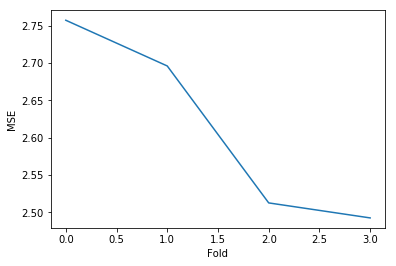

In [35]:
plt.plot(all_scores)
plt.xlabel('Fold')
plt.ylabel('MSE')

In [ ]:
K-Fold Cross Validation (epoch performance)

In [ ]:
from sklearn.model_selection import KFold
k = 10
folds = KFold(n_splits=k)
num_epochs = 100
all_mae_histories = list()

i=1
for train_index, test_index in folds.split(train_data_df):
    print('processing fold #', i)
    x_train, x_val = train_data_df.iloc[train_index, ], \
                     train_data_df.iloc[test_index, ]
    y_train, y_val = train_targets[train_index], \
                     train_targets[test_index]
    
    model = build_model()
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=num_epochs, 
                        batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    i = i+1

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [82]:
all_mae_df = pd.DataFrame(all_mae_histories)
all_mae_df = all_mae_df.transpose()
all_mae_df.columns = list(map(lambda f: "Fold_" + str(f+1), range(k)))
all_mae_df["Epoch"] = list(range(num_epochs))

In [83]:
all_mae_df.head()

,Fold_1,Fold_2,Fold_3,Fold_4,Epoch
0,4.074392,4.388947,4.037348,4.744960,0
1,3.039808,3.091461,3.633399,3.723447,1
2,2.743101,3.205156,3.008075,3.172774,2
3,2.833428,2.900387,2.834891,3.166602,3
4,2.338269,2.835837,2.783353,3.330059,4


(100, 4)

In [118]:
all_mae_df_molten = pd.melt(all_mae_df, id_vars="Epoch")
all_mae_df_molten.columns = ["Epochs", "Fold", "Validation MAE"]
all_mae_df_molten.head()

,Epochs,Fold,Validation MAE
0,0,Fold_1,4.074392
1,1,Fold_1,3.039808
2,2,Fold_1,2.743101
3,3,Fold_1,2.833428
4,4,Fold_1,2.338269


In [114]:
#all_mae_df_molten.groupby(["Epoch"]).transform("mean").head()

,MAE
0,0.329275
1,0.356323
2,0.211215
3,0.158294
4,0.405711


In [ ]:
all_mae_df.iloc[1][["Fold_1", "Fold_2", "Fold_3", "Fold_4"]].mean()

In [ ]:
ax = sns.pointplot(x="day", y="tip", data=tips, ci="sd")

In [ ]:
ax = sns.pointplot(x="Epochs", y="Validation MAE", data=all_mae_df_molten, ci="sd")

Text(0,0.5,'MAE')

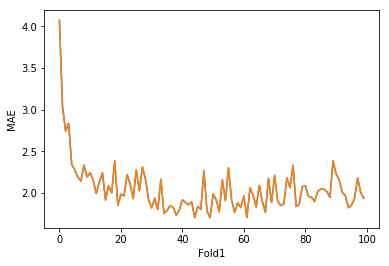

In [41]:
plt.plot(all_mae_histories[0])
plt.xlabel('Fold1')
plt.ylabel('MAE')

plt.plot(all_mae_histories[0])
plt.xlabel('Fold2')
plt.ylabel('MAE')